# Description of the Notebook
This Jupyter Notebook was our first try to analyse and modify our dataset. The main purpose was it to get a feeling for how the data looks and test the first cleaning functions

In [71]:
import pandas as pd 
import matplotlib.pyplot as plt

In [72]:
def load_data(path, nrows=None):
    return pd.read_csv(path, nrows=nrows)

In [73]:
# Load the data form seperate dictionary, because the data is too big to load onto github
# Dataload restricted to 1 million rows, because of speed and memory issues
# Just for testing purposes
dataframe_London_UTD19 = load_data(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19.csv", nrows=5000000)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,error,city,speed
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,0.0,london,NaN
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,0.0,london,NaN
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,0.0,london,NaN
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,0.0,london,NaN
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,0.0,london,NaN


In [74]:
# Drop the error column, because it is not needed
dataframe_London_UTD19 = dataframe_London_UTD19.drop(["error"], axis=1)
dataframe_London_UTD19 = dataframe_London_UTD19.drop(["speed"], axis=1)
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london


In [75]:
# Make a new column with the day of the week
dataframe_London_UTD19['day'] = pd.to_datetime(dataframe_London_UTD19['day'])
dataframe_London_UTD19['weekday'] = dataframe_London_UTD19['day'].dt.day_name()
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday


In [76]:
#dataframe_London_UTD19 = clip_outliers(dataframe_London_UTD19,column = 'occ', group_by_detid=False, outlier_factor=1.5)
#dataframe_London_UTD19 = clip_outliers(dataframe_London_UTD19,column = 'flow', group_by_detid=False, outlier_factor=2.5)

In [77]:
#Calculate the speed using the formula speed = flow / occupancy
dataframe_London_UTD19['traffic'] = dataframe_London_UTD19['flow'] * dataframe_London_UTD19['occ']
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


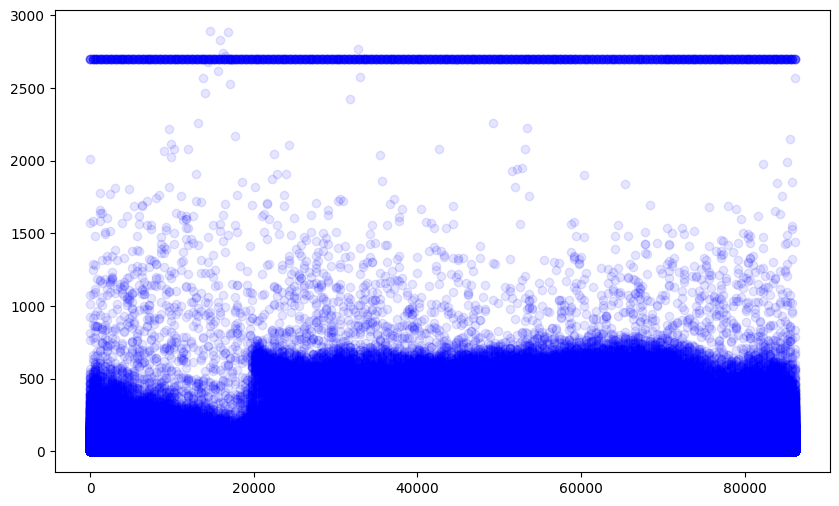

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframe_London_UTD19['interval'], dataframe_London_UTD19['traffic'], alpha=0.1, color='blue')
plt.show()

In [79]:
#Filter the data for the EAST_N04/161x1 detector
#to test the traffic calculation
dataframeEAST_N04 = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N04/161x1']
dataframeEAST_N04.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


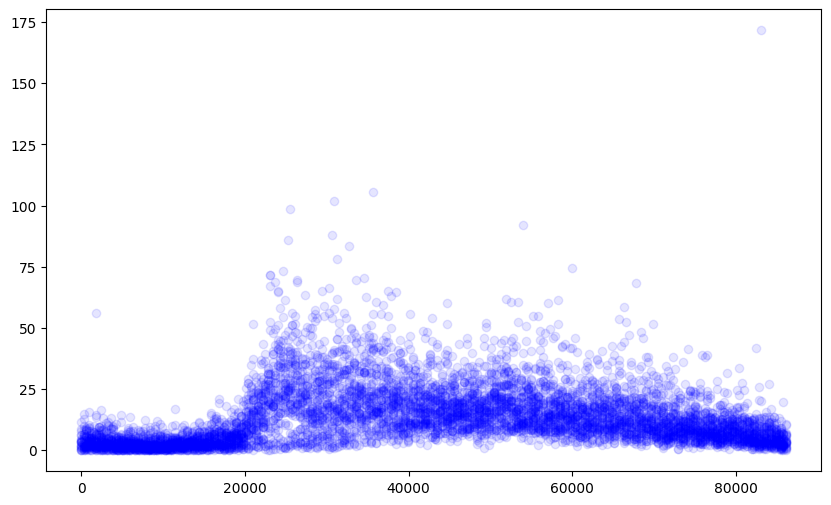

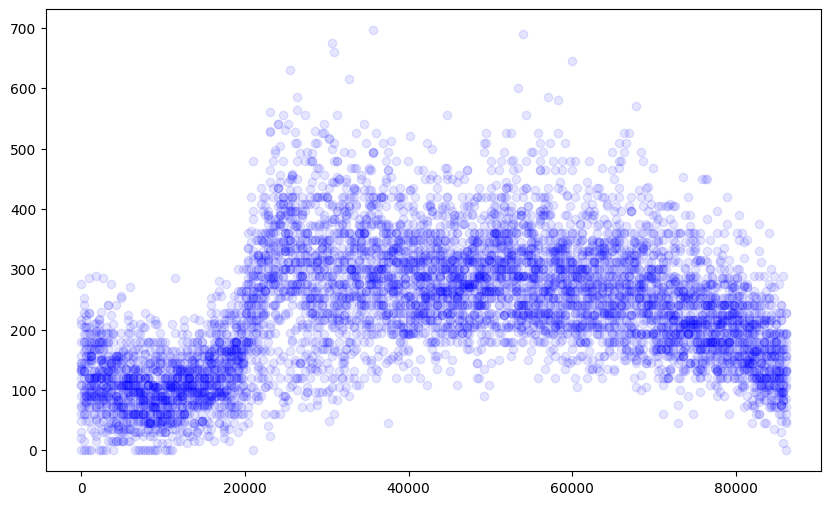

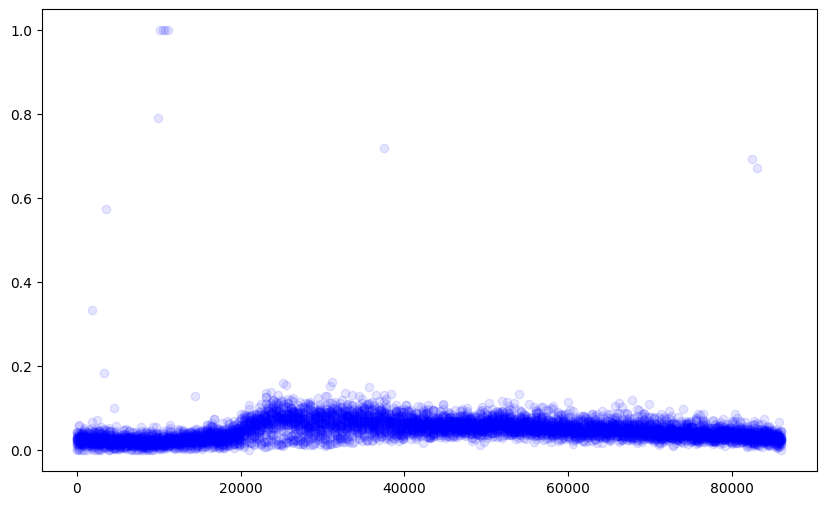

In [80]:
#Plot the speed of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [81]:
dataframeEAST_N04Saturday = dataframeEAST_N04[dataframeEAST_N04['weekday'] == 'Saturday']
dataframeEAST_N04Saturday.head()

,day,interval,detid,flow,occ,city,weekday,traffic
0,2015-05-16,0,EAST_N04/161x1,144.0,0.028333,london,Saturday,4.08
1,2015-05-16,300,EAST_N04/161x1,204.0,0.040000,london,Saturday,8.16
2,2015-05-16,600,EAST_N04/161x1,216.0,0.039167,london,Saturday,8.46
3,2015-05-16,900,EAST_N04/161x1,168.0,0.029167,london,Saturday,4.90
4,2015-05-16,1200,EAST_N04/161x1,144.0,0.024167,london,Saturday,3.48


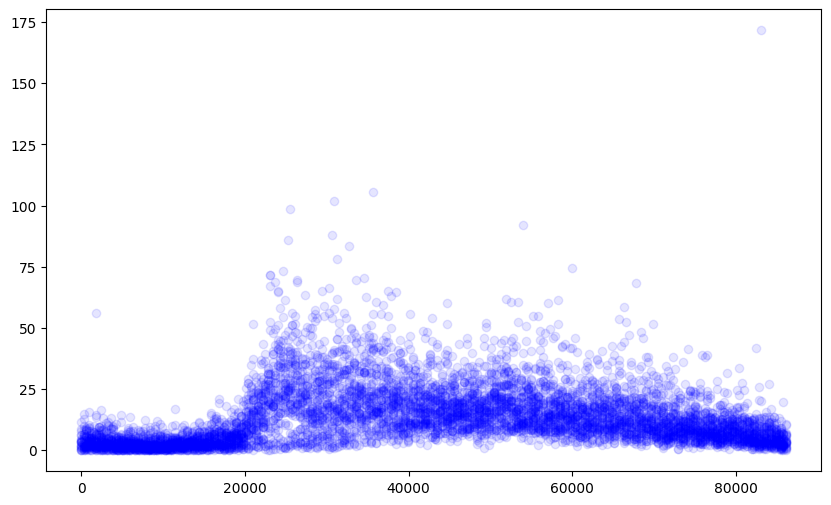

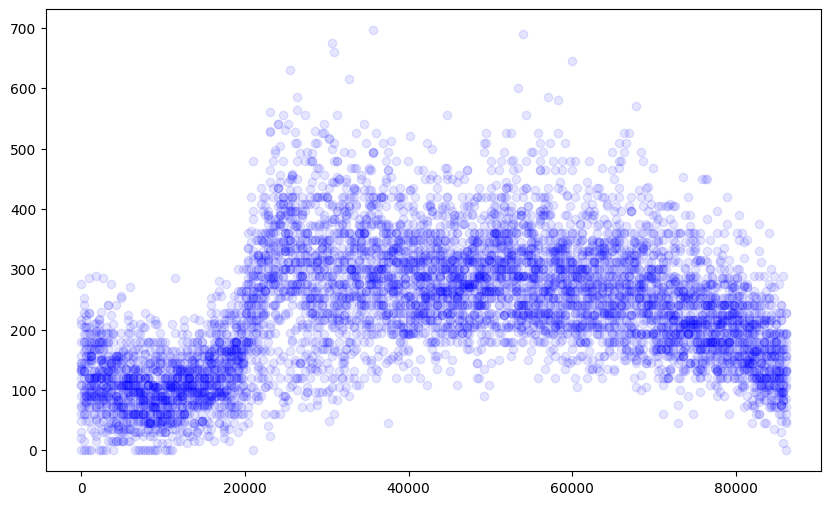

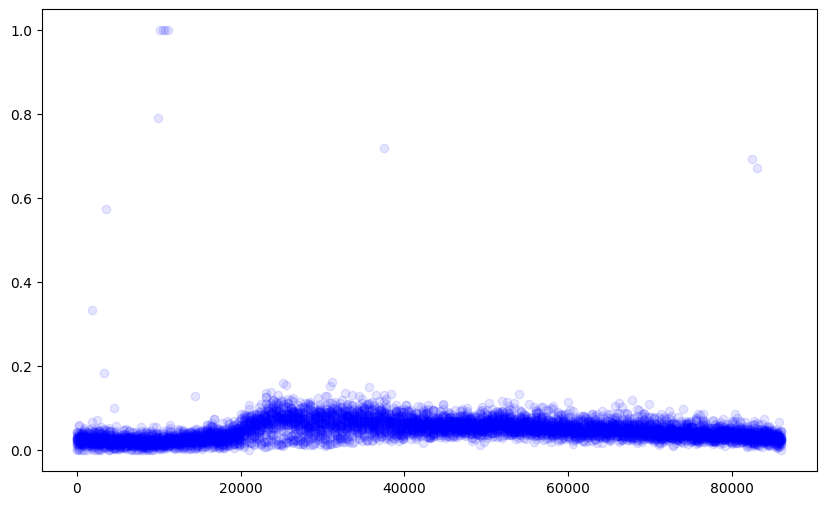

In [82]:
#Plot the speed of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()
#Plot the flow of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['flow'], alpha=0.1, color='blue')
plt.show()
#Plot the occupancy of the EAST_N04/161x1 detector on a Saturday
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['occ'], alpha=0.1, color='blue')
plt.show()

In [83]:
# Calculate the mean traffic in n intervals
def calculate_mean_in_intervals(group, column, num_intervals):
    interval_size = len(group) // num_intervals
    means = []
    
    for i in range(num_intervals):
        start_idx = i * interval_size
        end_idx = (i + 1) * interval_size if i < num_intervals - 1 else len(group)
        interval_mean = group.iloc[start_idx:end_idx][column].mean()
        means.append(interval_mean)
    
    return means

In [84]:
# Clip outliers in a group
def clip_group(group, column, outlier_factor, num_intervals):
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - outlier_factor * IQR
    upper_bound = Q3 + outlier_factor * IQR
    
    # Calculate means in intervals
    means = calculate_mean_in_intervals(group, column, num_intervals)
    interval_size = len(group) // num_intervals
    
    def get_interval_mean(index):
        interval_index = index // interval_size
        if interval_index >= num_intervals:
            interval_index = num_intervals - 1
        return means[interval_index]
    
    # Replace outliers with the mean value of their respective interval
    group[column] = group.apply(lambda row: get_interval_mean(row.name) if row[column] < lower_bound or row[column] > upper_bound else row[column], axis=1)
    return group

In [85]:
#Clip functions to remove outliers for every detector
def clip_outliers(df, column, group_by_detid=False, outlier_factor=1.5, num_intervals=24):
    if group_by_detid:
        df = df.groupby('detid').apply(clip_group, column, outlier_factor, num_intervals)
        # reset the index to avoid issues with the groupby operation
        df = df.reset_index(drop=True)
    else:
        df = clip_group(df, column, outlier_factor, num_intervals)
    
    return df

In [86]:
#Detect anomalies for every detector
def detect_anomalies(df):
    df = df.groupby('detid')['traffic'].mean().reset_index()
    Q1 = df['traffic'].quantile(0.25)
    Q3 = df['traffic'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Identify anomalies
    anomalies = df[(df['traffic'] < lower_bound) | (df['traffic'] > upper_bound)]
    
    # Return unique detid values where anomalies are detected
    return anomalies['detid'].unique()

In [87]:
# Filter the DataFrame to clip outliers
# Clip means setting the values outside the bounds to the bounds
# This is done to make the data more readable
print(dataframe_London_UTD19.head())
dataframe_London_UTD19 = clip_outliers(dataframe_London_UTD19,column='traffic', group_by_detid=True)
print(dataframe_London_UTD19.head())

         day  interval           detid   flow       occ    city   weekday  \
0 2015-05-16         0  EAST_N04/161x1  144.0  0.028333  london  Saturday   
1 2015-05-16       300  EAST_N04/161x1  204.0  0.040000  london  Saturday   
2 2015-05-16       600  EAST_N04/161x1  216.0  0.039167  london  Saturday   
3 2015-05-16       900  EAST_N04/161x1  168.0  0.029167  london  Saturday   
4 2015-05-16      1200  EAST_N04/161x1  144.0  0.024167  london  Saturday   

   traffic  
0     4.08  
1     8.16  
2     8.46  
3     4.90  
4     3.48  
         day  interval           detid   flow       occ    city   weekday  \
0 2015-05-16         0  CNTR_N00/005x1  840.0  0.110000  london  Saturday   
1 2015-05-16       300  CNTR_N00/005x1  564.0  0.096667  london  Saturday   
2 2015-05-16       600  CNTR_N00/005x1  468.0  0.068333  london  Saturday   
3 2015-05-16       900  CNTR_N00/005x1  816.0  0.104167  london  Saturday   
4 2015-05-16      1200  CNTR_N00/005x1  864.0  0.110000  london  Saturday 

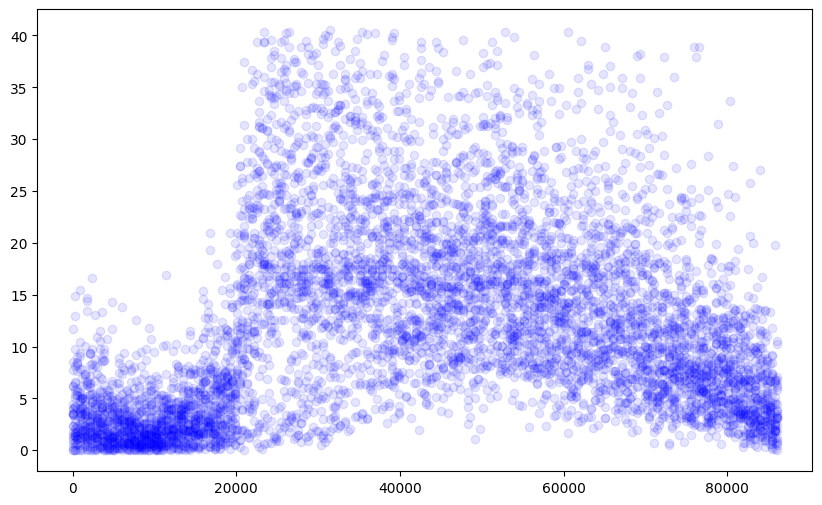

In [88]:
#plot for one detector
dataframeEAST_N04 = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N04/161x1']
plt.figure(figsize=(10, 6))
plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
plt.show()

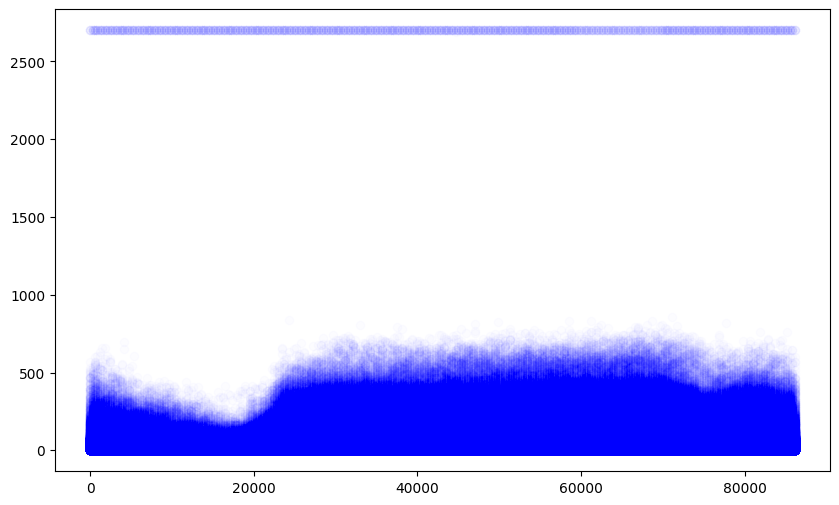

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframe_London_UTD19['interval'], dataframe_London_UTD19['traffic'], alpha=0.01, color='blue')
plt.show()

Different value for every detector issue

In [90]:
dataframe_London_detectors = load_data(path=r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_detectors.csv")
dataframe_London_detectors.head()

,detid,length,pos,fclass,road,limit,citycode,lanes,linkid,long,lat
0,EAST_N04/161x1,0.303585,0.261157,secondary,Homerton Road,NaN,london,1.0,5082.0,-0.021497,51.550929
1,EAST_N04/161y1,0.103679,0.063417,primary,Eastway,NaN,london,1.0,5091.0,-0.020899,51.550704
2,EAST_N04/162a1,0.260623,0.117906,secondary,Homerton Road,NaN,london,1.0,5083.0,-0.022649,51.550907
3,EAST_N04/162a2,0.216874,0.117942,secondary,Homerton Road,NaN,london,1.0,5084.0,-0.022617,51.550880
4,EAST_N04/163f1,0.344754,0.329789,primary,Eastway,NaN,london,1.0,5092.0,-0.019288,51.552281


In [91]:
# Merge the DataFrames on 'detid' and include only the 'lanes' column from dataframe_London_detectors
if 'detid' in dataframe_London_UTD19.index.names:
    dataframe_London_UTD19 = dataframe_London_UTD19.reset_index(drop=True)

if 'detid' in dataframe_London_detectors.index.names:
    dataframe_London_detectors = dataframe_London_detectors.reset_index(drop=True)

dataframe_London_UTD19 = dataframe_London_UTD19.merge(dataframe_London_detectors[['detid', 'lanes']], on='detid', how='left')
dataframe_London_UTD19.head()

,day,interval,detid,flow,occ,city,weekday,traffic,lanes
0,2015-05-16,0,CNTR_N00/005x1,840.0,0.110000,london,Saturday,92.400000,1.0
1,2015-05-16,300,CNTR_N00/005x1,564.0,0.096667,london,Saturday,54.519992,1.0
2,2015-05-16,600,CNTR_N00/005x1,468.0,0.068333,london,Saturday,31.980000,1.0
3,2015-05-16,900,CNTR_N00/005x1,816.0,0.104167,london,Saturday,84.999999,1.0
4,2015-05-16,1200,CNTR_N00/005x1,864.0,0.110000,london,Saturday,95.040000,1.0


In [92]:
dataframe_London_UTD19['traffic'] = dataframe_London_UTD19['traffic'] / dataframe_London_UTD19['lanes']
dataframe_London_UTD19[['traffic']].describe()

,traffic
count,5.000000e+06
mean,3.152564e+01
std,7.963177e+01
min,0.000000e+00
25%,3.200000e-01
50%,6.720000e+00
75%,3.304327e+01
max,2.700000e+03


In [93]:
anomalous_detids = detect_anomalies(dataframe_London_UTD19)
dataframe_London_UTD19 = dataframe_London_UTD19[~dataframe_London_UTD19['detid'].isin(anomalous_detids)]
anomalous_detids.size

17

In [96]:
#Check for Outliners in the whole traffic data, not just for one detector
dataframe_London_UTD19 = clip_outliers(dataframe_London_UTD19,column = 'traffic', group_by_detid=False, outlier_factor=2.5)
dataframe_London_UTD19[['traffic']].describe()

,traffic
count,4.893057e+06
mean,1.731358e+01
std,2.336430e+01
min,0.000000e+00
25%,2.871589e-01
50%,6.250000e+00
75%,2.645690e+01
max,1.066340e+02


In [97]:
# Map the traffic values to a range between 0 and 99
min_traffic = dataframe_London_UTD19['traffic'].min()
max_traffic = dataframe_London_UTD19['traffic'].max()

dataframe_London_UTD19.loc[:,'traffic'] = ((dataframe_London_UTD19['traffic'] - min_traffic) / (max_traffic - min_traffic)) * 99

# Convert the scaled values to integers
dataframe_London_UTD19.loc[:,'traffic'] = dataframe_London_UTD19['traffic'].fillna(0).astype(int)

In [98]:
#plot for one detector
dataframeEAST_N04 = dataframe_London_UTD19[dataframe_London_UTD19['detid'] == 'EAST_N04/161x1']
#plt.figure(figsize=(10, 6))
#plt.scatter(dataframeEAST_N04['interval'], dataframeEAST_N04['traffic'], alpha=0.1, color='blue')
#plt.show()

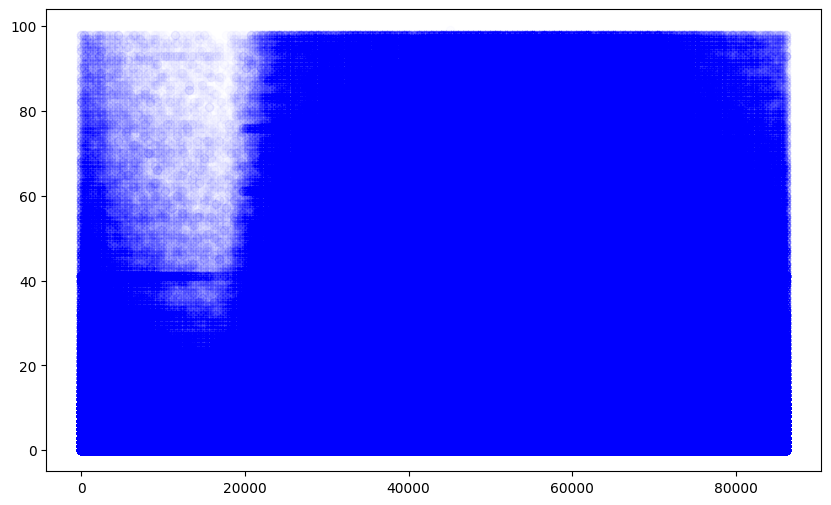

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(dataframe_London_UTD19['interval'], dataframe_London_UTD19['traffic'], alpha=0.01, color='blue')
plt.show()

In [100]:
dataframe_London_UTD19Modified = dataframe_London_UTD19.drop(["lanes", "occ", "flow", "city"], axis=1)
dataframe_London_UTD19Modified.head()

,day,interval,detid,weekday,traffic
0,2015-05-16,0,CNTR_N00/005x1,Saturday,85.0
1,2015-05-16,300,CNTR_N00/005x1,Saturday,50.0
2,2015-05-16,600,CNTR_N00/005x1,Saturday,29.0
3,2015-05-16,900,CNTR_N00/005x1,Saturday,78.0
4,2015-05-16,1200,CNTR_N00/005x1,Saturday,88.0


In [ ]:
dataframe_London_UTD19Modified.to_csv(r"C:\Users\samue\OneDrive\AIML\HS2024\Data Sicence Projekt\Data\London_UTD19_Modified.csv", index=False)